### Data Science Project: Predicting Airline Passenger Satisfaction

##### By Run Ariyasriwatana

##### About this project
This kernels find which factors affect airline passenger satisfaction the most. By doing feature engineering and feature selection which is clean, complete and explore the dataset, we get some insight which was used to build the machine learning model that can predict passenger satisfaction of the customer using only survey question data. I applied five models and tuned hyper parameter to improve the model performances and selected the best one.

#### Workflow Stages
1. Understand the problem statement
2. Acquire the datasets
3. Feature engineering
4. Feature selection
5. Model building
6. Hyper parameter tuning
7. Model Deployment
8. Solution of the problem Statement
9. How to improve the project


#### 1. Understand the problem statement

The problem statement is to identify the key factors which lead to the satisfaction of the passengers through survey collected by the airline.

My hypothesis on main factors should be

- Flight delay
- Inflight service
- Booking process
- Seat Comfort
- Baggage Handling

#### 2. Acquire the datasets

we use datasets provided in kaggle.

First, we need to import necessary libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

get the train and test datasets.

In [128]:
df_train = pd.read_csv('train.csv')

In [129]:
df_test = pd.read_csv('test.csv')

Merge test and train dataset to get big picture of the datasets.

In [130]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True )

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [132]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


drop index column

In [133]:
df2 = df.drop(['Unnamed: 0', 'id'], axis=1)
df2.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


#### 3. Feature Engineering

In [134]:
df2.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

##### 3.1 Define feature category:

Categorical feature: Gender, Customer Type, Type of Travel

Ordinal categorical feature: Class, satisfaction

Continuous numerical feature: Flight Distance, Age, Departure Delay in Minutes, Arrival Delay in Minutes 





Discrete numerical feature: Inflight wifi service,
       Departure/Arrival time convenient, Ease of Online booking,
       Gate location, Food and drink, Online boarding, Seat comfort,
       Inflight entertainment, On-board service, Leg room service,
       Baggage handling, Checkin service, Inflight service,
       Cleanliness

In [135]:
df2.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

##### 3.2 Handling the missing values

try to complete Arrival Delay in Minutes

Arrival Delay in minutes might have relationship with Departure Delay in Minutes. Let's try plot scatter chart on it.

In [136]:
dftocompletedelay = df2[~(df2['Arrival Delay in Minutes'].isnull())]
dftocompletedelay.shape

(129487, 23)

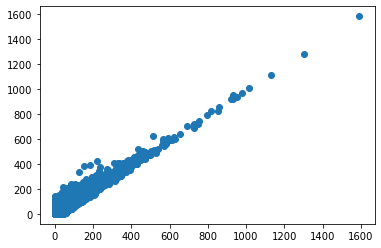

In [137]:
plt.scatter(dftocompletedelay['Departure Delay in Minutes'], dftocompletedelay['Arrival Delay in Minutes'])

Use linear regression to complete Arrival in minutes.

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
Xdepart = dftocompletedelay[['Departure Delay in Minutes']]
yarrival = dftocompletedelay[['Arrival Delay in Minutes']]

In [140]:
linear_tocomplete = LinearRegression()

In [141]:
linear_tocomplete.fit(Xdepart, yarrival)

LinearRegression()

In [142]:
linear_tocomplete.predict([[400]])

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[392.29711232]])

In [143]:
xdelay_tocomplete = df2[df2['Arrival Delay in Minutes'].isnull()]
x_delay_pred = xdelay_tocomplete[['Departure Delay in Minutes']]

In [144]:
y_delay_pred = linear_tocomplete.predict(x_delay_pred)

In [145]:
y_delay_pred.shape

(393, 1)

In [146]:
xdelay_tocomplete.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


In [147]:
xdelay_tocomplete['Arrival Delay in Minutes'] = y_delay_pred

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_926/3978062646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdelay_tocomplete['Arrival Delay in Minutes'] = y_delay_pred


In [148]:
xdelay_tocomplete.shape

(393, 23)

combine dataframe without null value in Arrival Delay in Minutes feature with predicted Arrival Delay in Minutes feature dataframe

In [149]:
df3 = pd.concat([dftocompletedelay, xdelay_tocomplete], axis=0)

In [150]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129372
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

now we have complete dataset

##### 3.3 Get insight from dataset

In [151]:
df3.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


First, look at the count of satisfaction

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

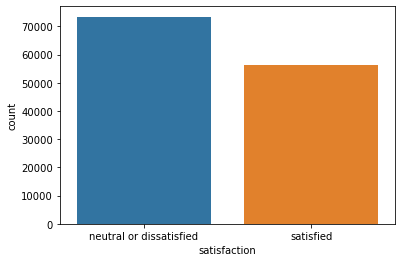

In [152]:
sns.countplot('satisfaction', data=df3)

Look at the count of categorical feature

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

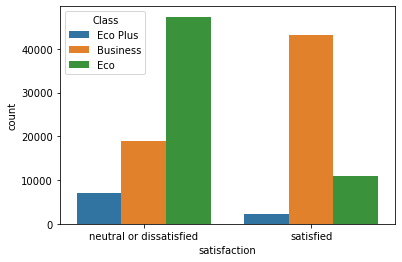

In [153]:
# Class
sns.countplot('satisfaction', data=df3, hue='Class')

Business class is the only class that has more satisfaction than neutral satisfaction or dissatisfaction.

In [154]:
df3.groupby('Class')['satisfaction'].value_counts(normalize=True)

Class     satisfaction           
Business  satisfied                  0.694434
          neutral or dissatisfied    0.305566
Eco       neutral or dissatisfied    0.812327
          satisfied                  0.187673
Eco Plus  neutral or dissatisfied    0.753586
          satisfied                  0.246414
Name: satisfaction, dtype: float64

Business class passenger has the most satisfaction rate with 69.5 % while satisfaction rate of eco and eco plus are around 18.7 % and 24.6 % respectively.

In [155]:
df3.groupby('Class').mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Class,,,,,,,,,,,,,,,,,,
Business,41.617278,1676.088256,2.775917,2.907915,2.915653,2.985103,3.329955,3.719032,3.763707,3.639350,3.682529,3.646042,3.844852,3.521010,3.846268,3.481998,14.304585,14.562364
Eco,37.206863,743.998199,2.673944,3.192577,2.602926,2.969576,3.086556,2.814677,3.141813,3.096572,3.119707,3.083778,3.450617,3.124423,3.466497,3.104821,15.083829,15.680308
Eco Plus,38.728934,747.089151,2.756030,3.209967,2.661991,2.968441,3.110403,2.885559,3.168207,3.120497,3.036234,3.056211,3.351504,3.014557,3.382850,3.118478,15.122835,15.883235


/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

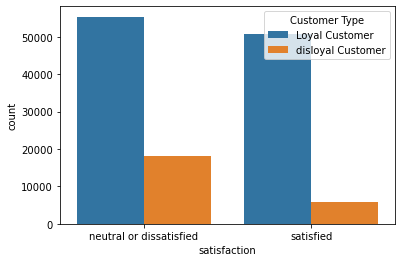

In [156]:
# Customer Type
sns.countplot('satisfaction', data=df3, hue='Customer Type')

Loyal customer has higher satisfaction than disroyal customer

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

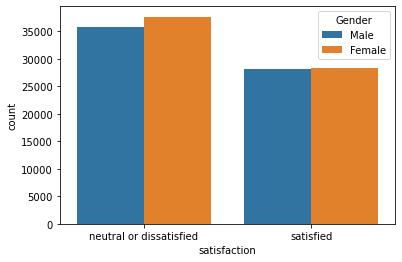

In [157]:
# Gender
sns.countplot('satisfaction', data=df3, hue='Gender')

Both gender seem to be more dissatisfaction than satisfaction

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

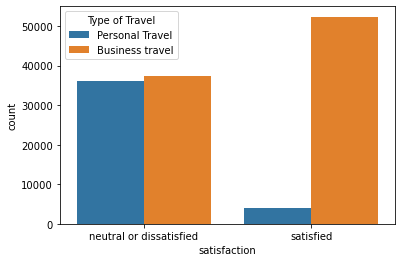

In [158]:
# Customer Type
sns.countplot('satisfaction', data=df3, hue='Type of Travel')

This is interesting. Business travel passenger has more satisfaction than personal travel passenger

Look at continuous numerical feature

In [159]:
df3['Arrival Delay in Minutes'].describe()

count    129880.000000
mean         15.159969
std          38.592348
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

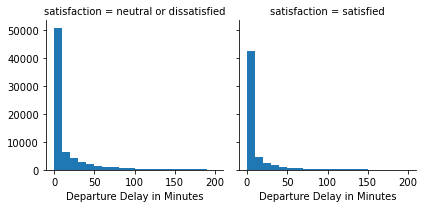

In [160]:
g1 = sns.FacetGrid(df3, col="satisfaction")
g1.map(plt.hist, "Departure Delay in Minutes", bins=20, range=[0, 200])

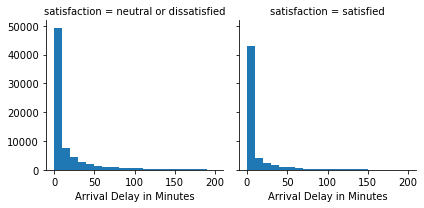

In [161]:
g2 = sns.FacetGrid(df3, col="satisfaction")
g2.map(plt.hist, "Arrival Delay in Minutes", bins=20, range=[0, 200])

Delay might not be key factor of satisfaction.

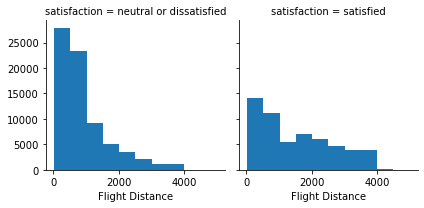

In [162]:
#Flight distance
g3 = sns.FacetGrid(df3, col="satisfaction")
g3.map(plt.hist, "Flight Distance")

Long Flight distance seem to has higher satisfaction than short flight distance

look at the count by survey features that might have main impact with satisfaction
- Ease of online booking
- Seat Comfort
- Inflight service
- Baggage Handling
- Online Boarding

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


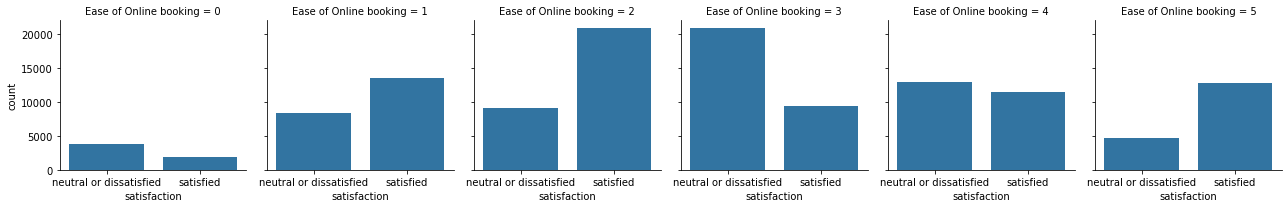

In [163]:
# Ease of booking online
g4 = sns.FacetGrid(df3, col="Ease of Online booking")
g4.map(sns.countplot, "satisfaction")

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


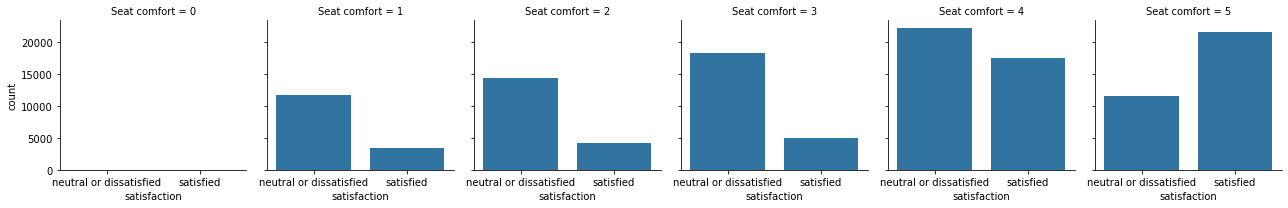

In [164]:
# Seat Comfort
g5 = sns.FacetGrid(df3, col="Seat comfort")
g5.map(sns.countplot, "satisfaction")

lower seat comfort score seem to has an impact on satisfaction.

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


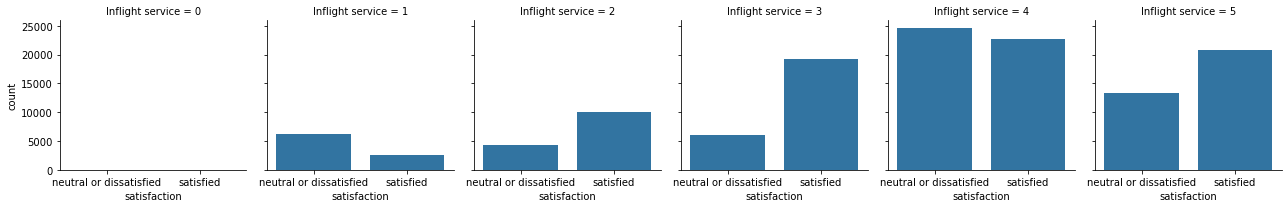

In [165]:
# Inflight service
g6 = sns.FacetGrid(df3, col="Inflight service")
g6.map(sns.countplot, "satisfaction")

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


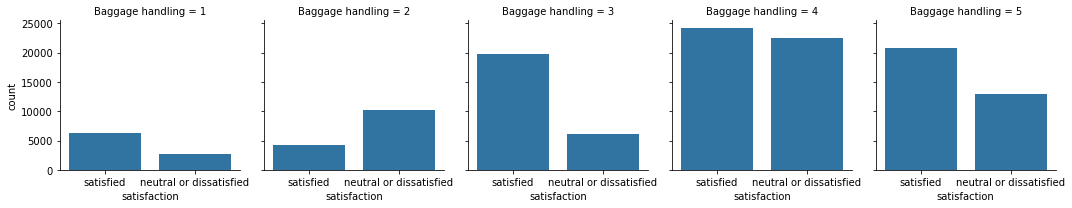

In [166]:
# Inflight service
g7 = sns.FacetGrid(df3, col="Baggage handling")
g7.map(sns.countplot, "satisfaction")

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


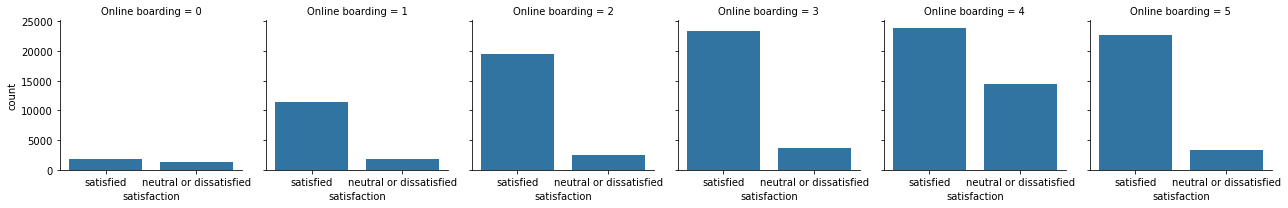

In [167]:
# Online boarding
g8 = sns.FacetGrid(df3, col="Online boarding")
g8.map(sns.countplot, "satisfaction")

Plot scatter chart between fight distance and delay time

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>

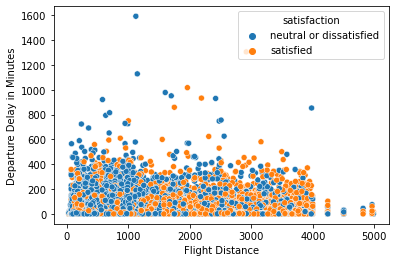

In [168]:
sns.scatterplot('Flight Distance', 'Departure Delay in Minutes', data=df3, hue='satisfaction')

Most passengers seem to be ok to have som delay with longer flight distance.

##### 3.4 Outlier Detection

remove outlier in Departure Delay in Minutes and Arrival Delay in Minutes features

{'whiskers': [<matplotlib.lines.Line2D at 0x169d619f0>,
 'caps': [<matplotlib.lines.Line2D at 0x169d61f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x169d61840>],
 'medians': [<matplotlib.lines.Line2D at 0x169d62530>],
 'fliers': [<matplotlib.lines.Line2D at 0x169d62800>],
 'means': []}

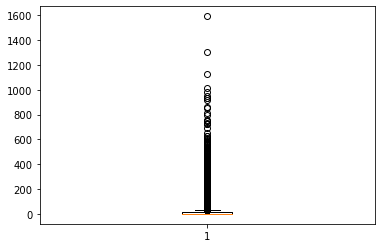

In [169]:
plt.boxplot(df3['Departure Delay in Minutes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x169da0b20>,
 'caps': [<matplotlib.lines.Line2D at 0x169da10c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169ccf700>],
 'medians': [<matplotlib.lines.Line2D at 0x169da1660>],
 'fliers': [<matplotlib.lines.Line2D at 0x169da1930>],
 'means': []}

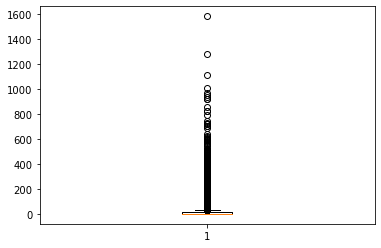

In [170]:
plt.boxplot(df3['Arrival Delay in Minutes'])

In [171]:
max_depart = df3['Departure Delay in Minutes'].quantile(0.99)
max_depart


180.0

In [172]:
max_arrival = df3['Arrival Delay in Minutes'].quantile(0.99)
max_arrival

182.8604864832015

In [173]:
df4 = df3[(df3['Departure Delay in Minutes'] <= max_depart) & (df3['Arrival Delay in Minutes'] <= max_arrival)]

In [174]:
df3.shape

(129880, 23)

In [175]:
df4.shape

(128438, 23)

##### 3.6 convert categorical into numerical feature

5 feature needed to be converted; Gender, cus type, travel type, class, satisfaction

In [176]:
df4.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [177]:
df4['Gender'].value_counts()

Female    65183
Male      63255
Name: Gender, dtype: int64

In [178]:
def convert_gender(x):
    if x == 'Male':
        return 1
    else: return 0

In [179]:
df4['Customer Type'].value_counts()

Loyal Customer       104933
disloyal Customer     23505
Name: Customer Type, dtype: int64

In [180]:
def convert_cus_type(x):
    if x == 'Loyal Customer':
        return 1
    else: return 0

In [181]:
df4['Type of Travel'].value_counts()

Business travel    88673
Personal Travel    39765
Name: Type of Travel, dtype: int64

In [182]:
def convert_travel_type(x):
    if x == 'Business travel':
        return 1
    else: return 0

In [183]:
df4['Class'].value_counts()

Business    61498
Eco         57626
Eco Plus     9314
Name: Class, dtype: int64

In [184]:
def convert_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    else: return 0

In [185]:
df4['satisfaction'].value_counts()

neutral or dissatisfied    72533
satisfied                  55905
Name: satisfaction, dtype: int64

In [186]:
def convert_satis(x):
    if x == 'satisfied':
        return 1
    else: return 0

convert the dataframe to numerical feature

In [187]:
df4['Gender'] = df4['Gender'].apply(convert_gender)
df4['Customer Type'] = df4['Customer Type'].apply(convert_cus_type)
df4['Type of Travel'] = df4['Type of Travel'].apply(convert_travel_type)
df4['Class'] = df4['Class'].apply(convert_class)
df4['satisfaction'] = df4['satisfaction'].apply(convert_satis)

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_926/68733392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Gender'] = df4['Gender'].apply(convert_gender)
/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_926/68733392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Customer Type'] = df4['Customer Type'].apply(convert_cus_type)
/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_926/68733392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [188]:
df4.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#### 4. Feature Selection

- From the initial, we already drop unnamed 0 and ID columns that are index and passenger ID of the dataset which we don't need these feature to develop the model. 
- In this case, we need to keep every feature in our model to see the impact between each survey variable and satisfaction rate.

Plot heatmap of correlation between each feature.

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_926/1019567548.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

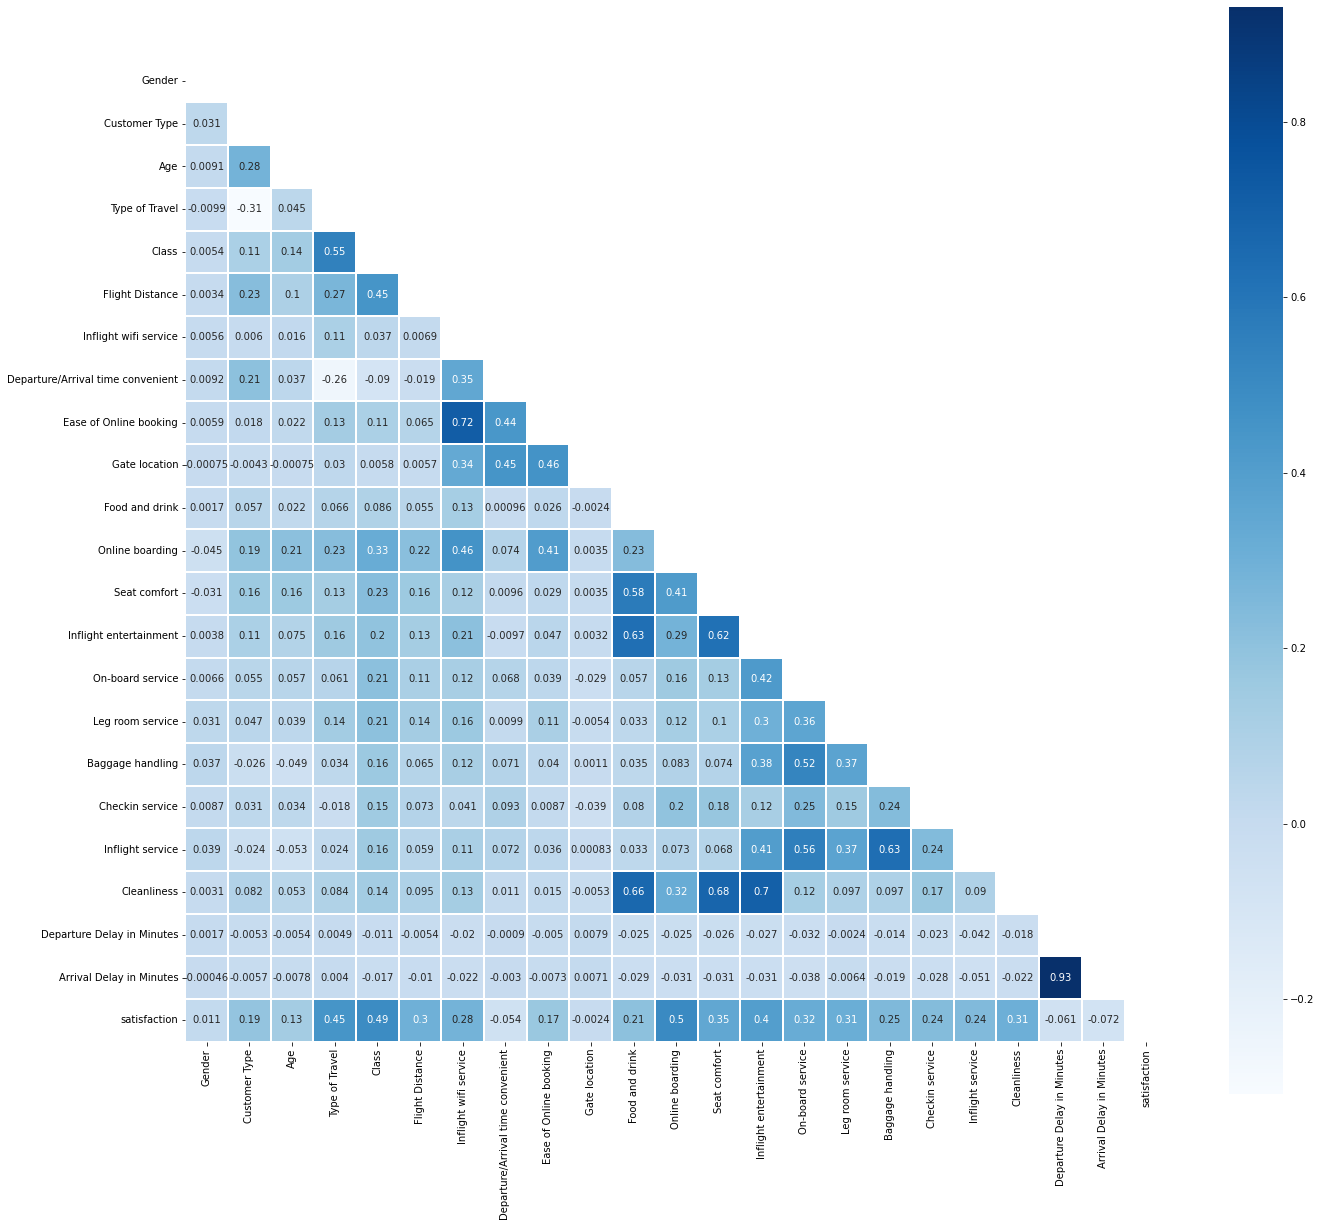

In [189]:
fig, ax = plt.subplots(figsize=(22,20))
corr = df4.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, mask=mask, square=True, cmap='Blues', linewidths=0.4)

#### 5. Model Building

we will use 5 model to classify satisfaction of passenger

- Random Forest
- Logistic Regression
- Naive Bayes Classifier
- Gradient Descent
- Decision Tree

##### 5.1 Random Forest

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
#X = df4.drop('satisfaction', axis=1)
X = df4.drop('satisfaction', axis=1)
y = df4.satisfaction

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [193]:
from sklearn.ensemble import RandomForestClassifier
rd_ft = RandomForestClassifier()

In [194]:
rd_ft.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
rd_ft.score(X_test, y_test)

0.9627218934911242

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rd_ft.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18159
           1       0.97      0.94      0.96     13951

    accuracy                           0.96     32110
   macro avg       0.96      0.96      0.96     32110
weighted avg       0.96      0.96      0.96     32110



In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rd_ft.predict(X_test))

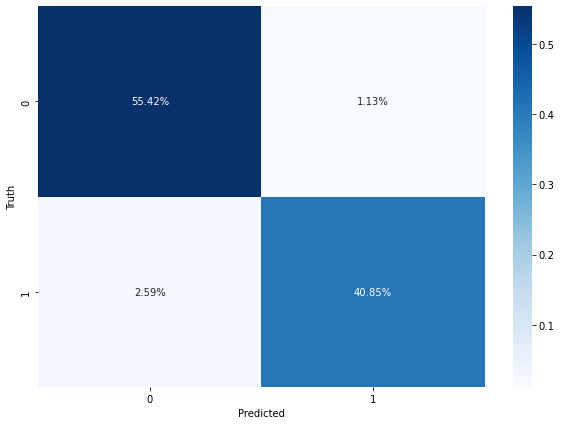

In [198]:
plt.figure(figsize=(10,7))
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
cross_val_score(RandomForestClassifier(n_estimators=7), X, y)

array([0.95472594, 0.9550763 , 0.95324665, 0.95639818, 0.95546385])

In [201]:
rd_ft.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 5.2 Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression

In [203]:
lr_ft = LogisticRegression()
lr_ft.fit(X_train, y_train)

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
lr_ft.score(X_test, y_test)

0.7862971037060106

In [205]:
cross_val_score(LogisticRegression(), X, y)

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

array([0.78752725, 0.79130333, 0.78694332, 0.77708569, 0.79573325])

##### 5.3 Naive bayes

In [206]:
from sklearn.naive_bayes import GaussianNB

In [207]:
nb_ft = GaussianNB()

In [208]:
nb_ft.fit(X_train, y_train)

GaussianNB()

In [209]:
nb_ft.score(X_test, y_test)

0.8638430395515416

In [210]:
cross_val_score(GaussianNB(), X, y)

array([0.86219246, 0.86328247, 0.86316568, 0.87012886, 0.86269319])

##### 5.4 SGD

In [211]:
from sklearn.linear_model import SGDClassifier

In [212]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [213]:
sgd.score(X_test, y_test)

0.813329180940517

In [214]:
cross_val_score(SGDClassifier(), X, y)

array([0.84058704, 0.8192152 , 0.84938493, 0.84887297, 0.8191303 ])

##### 5.5 Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
dt_ft = DecisionTreeClassifier()
dt_ft.fit(X_train, y_train)

DecisionTreeClassifier()

In [217]:
dt_ft.score(X_test, y_test)

0.9455309872313921

#### 6. Hyper parameter tuning

try to improve the accuracy of the model by using GridSearchCV to find best parameter.

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [219]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Random Forest' : {
            'model': RandomForestClassifier(),
            'params' : {
                'criterion': ['gini', 'entropy'],
                'n_estimators': [50, 100]
            }
        },
        'Logistic Regression': {
            'model': LogisticRegression(),
            'params' : {
                'C': [100, 10, 1.0, 0.1, 0.01]
            }
        },
        'Naive Baynes': {
            'model': GaussianNB(),
            'params' : {
            }
        },
        'Gradient Descent': {
            'model': SGDClassifier(),
            'params' : {
                'alpha': [0.0001, 0.001]
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini', 'entropy'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params']).sort_values('best_score', ascending=False)

find_best_model_using_gridsearchcv(X,y)

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,model,best_score,best_params
0,Random Forest,0.962921,"{'criterion': 'gini', 'n_estimators': 100}"
4,Decision Tree,0.948664,"{'criterion': 'entropy', 'splitter': 'best'}"
2,Naive Baynes,0.865849,{}
3,Gradient Descent,0.832264,{'alpha': 0.0001}
1,Logistic Regression,0.793005,{'C': 0.1}


From the table above, random forest with gini criterion and 100 n_estimators parameter is the most accuracy model followed by decision tree with entropy criterion and random spliter. Followed by naive baynes, gradient descent and logistic regression respectively. 

#### 7. Model Deployment

In [220]:
final_model = RandomForestClassifier(criterion='gini', n_estimators=100)

In [221]:
final_model.fit(X_train,y_train)

RandomForestClassifier()

In [222]:
final_model.score(X_test, y_test)

0.9624104640298973

use joblib library to import above model

In [223]:
from joblib import dump, load

In [224]:
dump(final_model, 'final_model_v1.joblib')

['final_model_v1.joblib']

#### 8. Solution of the problem statement

Get key factors of satisfaction from the model by using feature_importances method of the model.

In [225]:
fea_im = model.feature_importances_
fea_im_df = pd.DataFrame({'feature':[],'importance (%)':[]})
for i in range(len(fea_im)):
    fea_im_df2 = pd.DataFrame({'feature':[X.columns[i]],'importance (%)':[round(fea_im[i]*100, 2)]})
    fea_im_df = pd.concat([fea_im_df, fea_im_df2], axis=0, ignore_index=True)
fea_im_df.sort_values('importance (%)', ascending=False)

,feature,importance (%)
11,Online boarding,17.29
6,Inflight wifi service,14.27
4,Class,10.52
3,Type of Travel,9.65
13,Inflight entertainment,5.57
12,Seat comfort,4.87
15,Leg room service,3.97
1,Customer Type,3.79
5,Flight Distance,3.64
8,Ease of Online booking,3.48


From the model as shown in table above
- The most impactful features on passenger satisfaction is online boarding and inflight wifi service.
- Passenger satisfaction still depends on seat class and travel type.

Based on my hypothesis that main factors should be

- Flight delay
- Inflight service
- Booking process
- Seat Comfort
- Baggage Handling

So the hypothesis isn't 100 % true
- Booking Process and Seat Comfort are important factors but not the most impactful factor of passenger satisfaction.
- Flight delay, inflight service and baggage handling aren't key factors of passenger satisfaction.

In [226]:
# keep rating question features
df5 = df4.drop(['Gender', 'Customer Type', 'Age', 'Flight Distance', 'Class', 'Type of Travel', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], axis=1)

In [227]:
# Average rating
df5.mean().sort_values(ascending=False)

Inflight service                     3.647059
Baggage handling                     3.631137
Seat comfort                         3.443584
On-board service                     3.384972
Inflight entertainment               3.360018
Leg room service                     3.347600
Checkin service                      3.306973
Cleanliness                          3.286808
Online boarding                      3.253266
Food and drink                       3.207361
Departure/Arrival time convenient    3.057413
Gate location                        2.976712
Ease of Online booking               2.757408
Inflight wifi service                2.729247
dtype: float64

Key takeaways
- Passenger satisfaction heavily rely on online boarding and inflight wifi service therefore both services should got improvement because both average score ratings aren't high.
- Passenger seat class(Eco, Eco Plus, Business) and tavel type(ondependant, business) are other important factors on passenger satisfaction (can cause error and misunderstanding).
- Inflight entertainment and seat comfort are factors that also have much impact on passenger satisfaction but not much as online boarding and inflight wifi service.

#### 9. How to improve the project

There are few approches that we can do to improve this project
- remove the redundant samples to reduce the runtime of the model.
- select just some features to build the model.
- try using other classification model such as support vector machine or k-nearest neighbors algorithm.